In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Delaware Department of Elections (https://elections.delaware.gov/archive/elect20/elect20_election_index.shtml)
Precinct shapefile from State of Delaware FirstMap GIS (http://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries)

Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

Precincts 10-02/13-02 were merged and precincts 02-09/10-09, 05-09/11-09, 08-09/12-09/13-09 were split in the shapefile to reflect changes made prior to the 2020 election.

- G20PREDBID - Joseph R. Biden (Democratic Party)
- G20PRERTRU - Donald J. Trump (Republican Party)
- G20PRELJOR - Jo Jorgensen (Libertarian Party)
- G20PREGHAW - Howie Hawkins (Green Party of Delaware)


- G20USSDCOO - Christopher A. Coons (Democratic Party)
- G20USSRWIT - Lauren Witzke (Republican Party)
- G20USSLFRO - Nadine M. Frost (Libertarian Party)
- G20USSITUR - Mark W. Turley (Independent Party of Delaware)


- G20HALDROC - Lisa Blunt Rochester (Democratic Party)
- G20HALRMUR - Lee Murphy (Republican Party)
- G20HALLROG - David L. Rogers (Libertarian Party)
- G20HALIPUR - Catherine S. Purcell (Independent Party of Delaware)


- G20GOVDCAR -John C. Carney Jr. (Democratic Party)
- G20GOVRMUR - Julianne E. Murray (Republican Party)
- G20GOVLMAC - John J. Machurek (Libertarian Party)
- G20GOVIDEM - Kathy S. DeMatteis (Independent Party of Delaware)


- G20LTGDHAL - Bethany Hall-Long (Democratic Party)
- G20LTGRHAL - Donyale Hall (Republican Party)


- G20INSDNAV - Trinidad Navarro (Democratic Party)
- G20INSRPIL - Julia Pillsbury (Republican Party)

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/de_2020/de_2020.shp")

In [3]:
vest_shp.shape

(434, 22)

In [4]:
vest_shp.head(1)

,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20USSDCOO,G20USSRWIT,G20USSLFRO,G20USSITUR,G20HALDROC,...,G20HALIPUR,G20GOVDCAR,G20GOVRMUR,G20GOVLMAC,G20GOVIDEM,G20LTGDHAL,G20LTGRHAL,G20INSDNAV,G20INSRPIL,geometry
0,01-21,419,247,7,1,434,222,6,3,397,...,5,429,225,7,3,418,236,421,227,"POLYGON ((-8424454.124 4829097.736, -8424475.4..."


<AxesSubplot:>

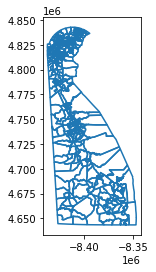

In [5]:
vest_shp.boundary.plot()

In [6]:
vest_shp[vest_shp['PRECINCT'] == '01-02']

,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20USSDCOO,G20USSRWIT,G20USSLFRO,G20USSITUR,G20HALDROC,...,G20HALIPUR,G20GOVDCAR,G20GOVRMUR,G20GOVLMAC,G20GOVIDEM,G20LTGDHAL,G20LTGRHAL,G20INSDNAV,G20INSRPIL,geometry
6,01-02,1107,53,8,3,1001,42,17,12,1034,...,11,1008,48,6,16,965,90,982,55,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."


In [7]:
vest_shp['PRECINCT'].unique()

array(['01-21', '01-22', '01-23', '01-24', '01-25', '01-01', '01-02',
       '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09',
       '01-10', '01-11', '01-12', '01-13', '01-15', '01-16', '01-17',
       '01-18', '01-19', '02-18', '02-19', '02-21', '02-22', '02-27',
       '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07',
       '03-08', '03-09', '03-10', '03-11', '03-12', '02-23', '02-24',
       '02-25', '02-26', '01-26', '01-27', '02-01', '02-02', '02-03',
       '02-04', '02-05', '02-06', '02-07', '02-08', '02-10', '02-11',
       '02-12', '02-13', '02-15', '02-16', '02-17', '04-12', '04-13',
       '04-15', '04-16', '04-17', '04-18', '04-19', '04-21', '04-22',
       '03-13', '03-15', '03-16', '03-17', '03-18', '03-19', '03-21',
       '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '04-01',
       '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08',
       '04-09', '04-10', '04-11', '05-18', '05-19', '05-21', '05-22',
       '06-01', '06-

# Election Results

## Load

In [8]:
election_results = pd.read_excel('./raw-from-source/SOS/2020_GeneralElection_Results_ByElectionDistrict.xlsx', 
                                thousands = ',', na_values = ' -   ')

In [9]:
election_results.head()

,County,RD-ED,Office Name,CandidateName,PartyName,MachineVotes,AbsenteeVotes,TotalVotes
0,KENT,11-05,President and Vice President,JOSEPH R. BIDEN JR. AND KAMALA D. HARRIS,Democratic Party,306.0,227.0,533.0
1,KENT,11-05,President and Vice President,DONALD J. TRUMP AND MICHAEL R. PENCE,Republican Party,895.0,111.0,1006.0
2,KENT,11-05,President and Vice President,HOWIE HAWKINS AND ANGELA NICOLE WALKER,Green Party Of Delaware,2.0,1.0,3.0
3,KENT,11-05,President and Vice President,"JO JORGENSEN AND JEREMY ""SPIKE"" COHEN",Libertarian Party,11.0,10.0,21.0
4,KENT,11-05,U.S. Senator,CHRISTOPHER A. COONS,Democratic Party,313.0,230.0,543.0


In [10]:
set(election_results['Office Name'].to_list())

{'Governor',
 'Insurance Commissioner',
 'KC Clerk of the Peace',
 'KC Register of Wills',
 'Levy Court District 1',
 'Levy Court District 3',
 'Levy Court District 5',
 'Lieutenant Governor',
 'NCC Clerk of the Peace',
 'NCC County Council District 10',
 'NCC County Council District 11',
 'NCC County Council District 12',
 'NCC County Council District 7',
 'NCC County Council District 8',
 'NCC County Council District 9',
 'NCC County Executive',
 'NCC President of County Council',
 'President and Vice President',
 'Representative in Congress',
 'SC Clerk of the Peace',
 'SC County Council District 1',
 'SC County Council District 2',
 'SC County Council District 3',
 'State Representative District 1',
 'State Representative District 10',
 'State Representative District 11',
 'State Representative District 12',
 'State Representative District 13',
 'State Representative District 14',
 'State Representative District 15',
 'State Representative District 16',
 'State Representative Distr

In [11]:
election_results = election_results[election_results['Office Name'].isin(['President and Vice President',
                       'U.S. Senator','Representative in Congress','Governor','Lieutenant Governor','Insurance Commissioner'])]

In [12]:
election_results.dtypes

County              object
RD-ED               object
Office Name         object
CandidateName       object
PartyName           object
 MachineVotes      float64
 AbsenteeVotes     float64
 TotalVotes        float64
dtype: object

## Pivot

In [13]:
election_results.columns

Index(['County', 'RD-ED', 'Office Name', 'CandidateName', 'PartyName',
       ' MachineVotes ', ' AbsenteeVotes ', ' TotalVotes '],
      dtype='object')

In [14]:
election_results = election_results.pivot_table(index = ['County','RD-ED'],
                         columns = ['Office Name','CandidateName'],
                        values = [' TotalVotes '],
                         aggfunc = 'sum')
election_results.reset_index(inplace = True)
election_results.head()

County  RD-ED        TotalVotes                    \
Office Name                           Governor                    
CandidateName               JOHN C. CARNEY JR. JOHN J. MACHUREK   
0               KENT  11-05              566.0             13.0   
1               KENT  11-06              401.0              8.0   
2               KENT  11-07              526.0              4.0   
3               KENT  11-08              231.0              5.0   
4               KENT  11-09              163.0              4.0   

                                                                            \
Office Name                                         Insurance Commissioner   
CandidateName JULIANNE E. MURRAY KATHY S. DEMATTEIS        JULIA PILLSBURY   
0                          955.0               13.0                  940.0   
1                          909.0               17.0                  933.0   
2                          824.0               18.0                  831.0   
3                          370.0               10.0                  390.0   
4                          539.0                4.0                  543.0   

                                                                 ...  \
Office Name                    Lieutenant Governor               ...   
CandidateName TRINIDAD NAVARRO   BETHANY HALL-LONG DONYALE HALL  ...   
0                        566.0               600.0        915.0  ...   
1                        383.0               422.0        897.0  ...   
2                        517.0               546.0        809.0  ...   
3                        214.0               227.0        379.0  ...   
4                        160.0               163.0        540.0  ...   

                                                     \
Office Name            President and Vice President   
CandidateName JO JORGENSEN AND JEREMY "SPIKE" COHEN   
0                                              21.0   
1                                              11.0   
2                                              13.0   
3                                               9.0   
4                                               6.0   

                                                        \
Office Name                                              
CandidateName JOSEPH R. BIDEN JR. AND KAMALA D. HARRIS   
0                                                533.0   
1                                                384.0   
2                                                524.0   
3                                                211.0   
4                                                145.0   

                                                                     \
Office Name   Representative in Congress                              
CandidateName       CATHERINE S. PURCELL DAVID L. ROGERS LEE MURPHY   
0                                   23.0            13.0      948.0   
1                                   18.0             9.0      909.0   
2                                   13.0             5.0      824.0   
3                                   11.0             6.0      375.0   
4                                    6.0             7.0      540.0   

                                                                       \
Office Name                                U.S. Senator                 
CandidateName LISA BLUNT ROCHESTER CHRISTOPHER A. COONS LAUREN WITZKE   
0                            543.0                543.0         950.0   
1                            386.0                397.0         901.0   
2                            509.0                523.0         799.0   
3                            214.0                224.0         372.0   
4                            155.0                155.0         536.0   

                                              
Office Name                                   
CandidateName MARK W. TURLEY NADINE M. FROST  
0                       34.0            18.0  
1                       23.

In [15]:
election_results.columns.to_list()

[('County', '', ''),
 ('RD-ED', '', ''),
 (' TotalVotes ', 'Governor', 'JOHN C. CARNEY JR.'),
 (' TotalVotes ', 'Governor', 'JOHN J. MACHUREK'),
 (' TotalVotes ', 'Governor', 'JULIANNE E. MURRAY'),
 (' TotalVotes ', 'Governor', 'KATHY S. DEMATTEIS'),
 (' TotalVotes ', 'Insurance Commissioner', 'JULIA PILLSBURY'),
 (' TotalVotes ', 'Insurance Commissioner', 'TRINIDAD NAVARRO'),
 (' TotalVotes ', 'Lieutenant Governor', 'BETHANY HALL-LONG'),
 (' TotalVotes ', 'Lieutenant Governor', 'DONYALE HALL'),
 (' TotalVotes ',
  'President and Vice President',
  'DONALD J. TRUMP AND MICHAEL R. PENCE'),
 (' TotalVotes ',
  'President and Vice President',
  'HOWIE HAWKINS AND ANGELA NICOLE WALKER'),
 (' TotalVotes ',
  'President and Vice President',
  'JO JORGENSEN AND JEREMY "SPIKE" COHEN'),
 (' TotalVotes ',
  'President and Vice President',
  'JOSEPH R. BIDEN JR. AND KAMALA D. HARRIS'),
 (' TotalVotes ', 'Representative in Congress', 'CATHERINE S. PURCELL'),
 (' TotalVotes ', 'Representative in Co

In [16]:
election_results.columns = ['County','RD-ED',
                            'G20GOVDCAR','G20GOVLMAC','G20GOVRMUR','G20GOVIDEM',
                            'G20INSRPIL','G20INSDNAV',
                            'G20LTGDHAL','G20LTGRHAL',
                            'G20PRERTRU','G20PREGHAW','G20PRELJOR','G20PREDBID',
                            'G20HALIPUR','G20HALLROG','G20HALRMUR','G20HALDROC',
                            'G20USSDCOO','G20USSRWIT','G20USSITUR','G20USSLFRO']
election_results.head()

,County,RD-ED,G20GOVDCAR,G20GOVLMAC,G20GOVRMUR,G20GOVIDEM,G20INSRPIL,G20INSDNAV,G20LTGDHAL,G20LTGRHAL,...,G20PRELJOR,G20PREDBID,G20HALIPUR,G20HALLROG,G20HALRMUR,G20HALDROC,G20USSDCOO,G20USSRWIT,G20USSITUR,G20USSLFRO
0,KENT,11-05,566.0,13.0,955.0,13.0,940.0,566.0,600.0,915.0,...,21.0,533.0,23.0,13.0,948.0,543.0,543.0,950.0,34.0,18.0
1,KENT,11-06,401.0,8.0,909.0,17.0,933.0,383.0,422.0,897.0,...,11.0,384.0,18.0,9.0,909.0,386.0,397.0,901.0,23.0,11.0
2,KENT,11-07,526.0,4.0,824.0,18.0,831.0,517.0,546.0,809.0,...,13.0,524.0,13.0,5.0,824.0,509.0,523.0,799.0,26.0,12.0
3,KENT,11-08,231.0,5.0,370.0,10.0,390.0,214.0,227.0,379.0,...,9.0,211.0,11.0,6.0,375.0,214.0,224.0,372.0,9.0,7.0
4,KENT,11-09,163.0,4.0,539.0,4.0,543.0,160.0,163.0,540.0,...,6.0,145.0,6.0,7.0,540.0,155.0,155.0,536.0,11.0,6.0


# Validating Election Results

## Race Totals

In [17]:
vest_shp.columns

Index(['PRECINCT', 'G20PREDBID', 'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW',
       'G20USSDCOO', 'G20USSRWIT', 'G20USSLFRO', 'G20USSITUR', 'G20HALDROC',
       'G20HALRMUR', 'G20HALLROG', 'G20HALIPUR', 'G20GOVDCAR', 'G20GOVRMUR',
       'G20GOVLMAC', 'G20GOVIDEM', 'G20LTGDHAL', 'G20LTGRHAL', 'G20INSDNAV',
       'G20INSRPIL', 'geometry'],
      dtype='object')

In [18]:
data_columns = ['G20PREDBID', 'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW',
       'G20USSDCOO', 'G20USSRWIT', 'G20USSLFRO', 'G20USSITUR', 'G20HALDROC',
       'G20HALRMUR', 'G20HALLROG', 'G20HALIPUR', 'G20GOVDCAR', 'G20GOVRMUR',
       'G20GOVLMAC', 'G20GOVIDEM', 'G20LTGDHAL', 'G20LTGRHAL', 'G20INSDNAV',
       'G20INSRPIL']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

Printing differences below
G20PREDBID is equal 	VEST: 296268 	RDH: 296268.0
G20PRERTRU is equal 	VEST: 200603 	RDH: 200603.0
G20PRELJOR is equal 	VEST: 5000 	RDH: 5000.0
G20PREGHAW is equal 	VEST: 2139 	RDH: 2139.0
G20USSDCOO is equal 	VEST: 291804 	RDH: 291804.0
G20USSRWIT is equal 	VEST: 186054 	RDH: 186054.0
G20USSLFRO is equal 	VEST: 5244 	RDH: 5244.0
G20USSITUR is equal 	VEST: 7833 	RDH: 7833.0
G20HALDROC is equal 	VEST: 281382 	RDH: 281382.0
G20HALRMUR is equal 	VEST: 196392 	RDH: 196392.0
G20HALLROG is equal 	VEST: 3814 	RDH: 3814.0
G20HALIPUR is equal 	VEST: 6682 	RDH: 6682.0
G20GOVDCAR is equal 	VEST: 292903 	RDH: 292903.0
G20GOVRMUR is equal 	VEST: 190312 	RDH: 190312.0
G20GOVLMAC is equal 	VEST: 3270 	RDH: 3270.0
G20GOVIDEM is equal 	VEST: 6150 	RDH: 6150.0
G20LTGDHAL is equal 	VEST: 285638 	RDH: 285638.0
G20LTGRHAL is equal 	VEST: 197343 	RDH: 197343.0
G20INSDNAV is equal 	VEST: 286743 	RDH: 286743.0
G20INSRPIL is equal 	VEST: 195305 	RDH: 195305.0

All other races are equa

## County-by-County Totals

In [19]:
vest_shp.shape

(434, 22)

In [20]:
election_results.shape

(439, 22)

In [21]:
election_results.sort_values('RD-ED').head()

,County,RD-ED,G20GOVDCAR,G20GOVLMAC,G20GOVRMUR,G20GOVIDEM,G20INSRPIL,G20INSDNAV,G20LTGDHAL,G20LTGRHAL,...,G20PRELJOR,G20PREDBID,G20HALIPUR,G20HALLROG,G20HALRMUR,G20HALDROC,G20USSDCOO,G20USSRWIT,G20USSITUR,G20USSLFRO
91,NEW CASTLE,01-01,681.0,8.0,62.0,8.0,74.0,664.0,624.0,118.0,...,10.0,725.0,9.0,7.0,60.0,682.0,682.0,53.0,9.0,17.0
92,NEW CASTLE,01-02,1103.0,6.0,49.0,20.0,53.0,1073.0,1015.0,124.0,...,3.0,1176.0,12.0,3.0,49.0,1122.0,1086.0,54.0,20.0,11.0
93,NEW CASTLE,01-03,732.0,3.0,34.0,14.0,35.0,718.0,670.0,75.0,...,0.0,778.0,11.0,5.0,26.0,729.0,711.0,30.0,13.0,11.0
94,NEW CASTLE,01-04,997.0,5.0,54.0,24.0,67.0,958.0,932.0,100.0,...,6.0,1079.0,17.0,8.0,50.0,994.0,973.0,52.0,17.0,19.0
95,NEW CASTLE,01-05,1023.0,12.0,152.0,13.0,170.0,972.0,949.0,201.0,...,16.0,1054.0,15.0,12.0,171.0,978.0,1012.0,132.0,17.0,23.0


Note: New Castle is not fips code 001. The first two digits of `RD-ED` do not correspond to fips. 

In [22]:
vest_shp.sort_values('PRECINCT').head()

,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20USSDCOO,G20USSRWIT,G20USSLFRO,G20USSITUR,G20HALDROC,...,G20HALIPUR,G20GOVDCAR,G20GOVRMUR,G20GOVLMAC,G20GOVIDEM,G20LTGDHAL,G20LTGRHAL,G20INSDNAV,G20INSRPIL,geometry
5,01-01,727,51,10,4,684,53,17,9,684,...,9,681,62,8,8,624,118,664,74,"POLYGON ((-8407935.202 4831832.283, -8407957.0..."
6,01-02,1107,53,8,3,1001,42,17,12,1034,...,11,1008,48,6,16,965,90,982,55,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."
7,01-03,596,53,0,1,527,42,15,15,532,...,14,537,49,6,16,505,78,536,44,"POLYGON ((-8411336.792 4828825.843, -8411346.1..."
8,01-04,1157,382,17,5,1191,315,16,17,1094,...,13,1175,344,8,16,1101,401,1110,388,"POLYGON ((-8413287.555 4832059.508, -8413275.1..."
9,01-05,1183,314,6,8,1145,281,16,14,1127,...,17,1150,282,10,11,1107,312,1152,269,"POLYGON ((-8420436.604 4810966.168, -8420438.1..."


The votes do not match for these, even though the state totals match. VEST only has the precinct column, and no county column. 

In [23]:
vest_shp['PRECINCT'].unique()

array(['01-21', '01-22', '01-23', '01-24', '01-25', '01-01', '01-02',
       '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09',
       '01-10', '01-11', '01-12', '01-13', '01-15', '01-16', '01-17',
       '01-18', '01-19', '02-18', '02-19', '02-21', '02-22', '02-27',
       '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07',
       '03-08', '03-09', '03-10', '03-11', '03-12', '02-23', '02-24',
       '02-25', '02-26', '01-26', '01-27', '02-01', '02-02', '02-03',
       '02-04', '02-05', '02-06', '02-07', '02-08', '02-10', '02-11',
       '02-12', '02-13', '02-15', '02-16', '02-17', '04-12', '04-13',
       '04-15', '04-16', '04-17', '04-18', '04-19', '04-21', '04-22',
       '03-13', '03-15', '03-16', '03-17', '03-18', '03-19', '03-21',
       '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '04-01',
       '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08',
       '04-09', '04-10', '04-11', '05-18', '05-19', '05-21', '05-22',
       '06-01', '06-

In [24]:
election_results['RD-ED'].unique()

array(['11-05', '11-06', '11-07', '11-08', '11-09', '11-10', '28-01',
       '28-02', '28-03', '28-04', '28-05', '28-06', '28-07', '28-08',
       '28-09', '28-10', '28-11', '28-12', '28-13', '28-14', '29-01',
       '29-02', '29-03', '29-04', '29-05', '29-06', '29-07', '29-08',
       '29-09', '29-10', '29-11', '29-12', '29-13', '30-01', '30-02',
       '30-03', '30-04', '30-05', '30-06', '30-07', '30-08', '30-09',
       '30-10', '30-11', '30-12', '31-01', '31-02', '31-03', '31-04',
       '31-05', '31-06', '31-07', '31-08', '31-09', '31-10', '31-11',
       '31-16', '31-17', '32-01', '32-02', '32-03', '32-04', '32-05',
       '32-06', '32-07', '32-08', '32-09', '32-10', '32-11', '32-12',
       '33-01', '33-02', '33-03', '33-04', '33-05', '33-06', '33-07',
       '33-08', '33-09', '33-10', '34-01', '34-02', '34-03', '34-04',
       '34-05', '34-06', '34-07', '34-08', '34-09', '34-10', '34-11',
       '01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07',
       '01-08', '01-

Did VEST switch the order of the two-digit numbers? Try that out: 

In [25]:
print('VEST Min, max first two characters: ', vest_shp['PRECINCT'].str[:2].min(), vest_shp['PRECINCT'].str[:2].max())
print('VEST Min, max last two characters: ', vest_shp['PRECINCT'].str[-2:].min(), vest_shp['PRECINCT'].str[-2:].max())

print('RDH Min, max first two characters: ', election_results['RD-ED'].str[:2].min(), election_results['RD-ED'].str[:2].max())
print('RDH Min, max last two characters: ', election_results['RD-ED'].str[-2:].min(), election_results['RD-ED'].str[-2:].max())

VEST Min, max first two characters:  01 16
VEST Min, max last two characters:  01 41
RDH Min, max first two characters:  01 41
RDH Min, max last two characters:  01 18


Yes, it looks like VEST switched the first two and last two characters, but the SOS precincts go up to 18 for the last two characters and only to 16 for the VEST characters. Perhaps because of split precincts? 

We will only validate the statewide totals and not continue to validate the county totals at this time. 

## Precinct-by-Precinct Votes

Try to switch the characters and compare the precinct results: 

In [26]:
election_results['PRECINCT'] = election_results['RD-ED'].str[-2:] + '-' + election_results['RD-ED'].str[:2]
election_results[['PRECINCT','RD-ED']]

,PRECINCT,RD-ED
0,05-11,11-05
1,06-11,11-06
2,07-11,11-07
3,08-11,11-08
4,09-11,11-09
...,...,...
434,06-41,41-06
435,07-41,41-07
436,08-41,41-08
437,16-41,41-16


### Distribute UOCAVA Votes

Created the following shapefile by intersecting the 2010 Census county shapefile with the Precincts shapefile linked by VEST in GQIS, to get the precinct to county translation. 

In [27]:
precinct_county = gp.read_file('./raw-from-source/Census/de_precincts_county_intersection/de_precincts_county_intersection.shp')

In [28]:
precinct_county[['EDRD_2012','COUNTY','COUNTYFP']]

,EDRD_2012,COUNTY,COUNTYFP
0,01-21,New Castle County,003
1,01-22,New Castle County,003
2,01-23,New Castle County,003
3,01-24,New Castle County,003
4,01-25,New Castle County,003
...,...,...,...
425,08-38,Sussex County,005
426,08-40,Sussex County,005
427,08-41,Sussex County,005
428,09-20,Sussex County,005


In [29]:
election_results.shape

(439, 23)

In [30]:
election_results_county = election_results.merge(precinct_county, left_on = 'PRECINCT', right_on = 'EDRD_2012', how = 'outer', indicator = True)
election_results_county.groupby('_merge').count()

,County,RD-ED,G20GOVDCAR,G20GOVLMAC,G20GOVRMUR,G20GOVIDEM,G20INSRPIL,G20INSDNAV,G20LTGDHAL,G20LTGRHAL,...,POPULATION,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,10,10,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [31]:
election_results_county[election_results_county['_merge'] != 'both'][['PRECINCT','EDRD_2012']]

,PRECINCT,EDRD_2012
56,16-31,NaN
57,17-31,NaN
117,17-02,NaN
118,18-02,NaN
196,10-09,NaN
197,11-09,NaN
198,12-09,NaN
199,13-09,NaN
437,16-41,NaN
438,17-41,NaN


These precincts are not in the online shapefile linked by VEST. 

In [32]:
to_dole_out_totals = pd.DataFrame(election_results_county[election_results_county['PRECINCT'].isin(['17-02','16-31','16-41'])].groupby(["County"]).sum())
to_dole_out_totals.reset_index(inplace=True,drop=False)

precinct_specific_totals = pd.DataFrame(election_results_county[~election_results_county['PRECINCT'].isin(['17-02','16-31','16-41'])].groupby(["County"]).sum())
precinct_specific_totals.reset_index(inplace=True,drop=False)

In [33]:
print(election_results_county.loc[election_results_county["County"].isna()])
election_results_county.loc[election_results_county["County"].isna(),"County"]="NEW CASTLE"

    County RD-ED  G20GOVDCAR  G20GOVLMAC  G20GOVRMUR  G20GOVIDEM  G20INSRPIL  \
439    NaN   NaN         NaN         NaN         NaN         NaN         NaN   

     G20INSDNAV  G20LTGDHAL  G20LTGRHAL  ...  DISTRICT  GEOID  \
439         NaN         NaN         NaN  ...        02  10003   

                            NAME     STATE             COUNTY  TOTPOP10  \
439  New Castle County, Delaware  Delaware  New Castle County  538479.0   

     STATEFP  COUNTYFP                                           geometry  \
439       10       003  POLYGON ((-8411754.463 4827552.762, -8411752.4...   

         _merge  
439  right_only  

[1 rows x 38 columns]


In [34]:
print(election_results_county.shape)
election_results_county = election_results_county[~election_results_county['PRECINCT'].isin(['17-02','16-31','16-41'])]
print(election_results_county.shape)
election_results_county.reset_index(inplace=True,drop=False)

(440, 38)
(437, 38)


In [35]:
column_list = ['G20PREDBID', 'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW',
       'G20USSDCOO', 'G20USSRWIT', 'G20USSLFRO', 'G20USSITUR', 'G20HALDROC',
       'G20HALRMUR', 'G20HALLROG', 'G20HALIPUR', 'G20GOVDCAR', 'G20GOVRMUR',
       'G20GOVLMAC', 'G20GOVIDEM', 'G20LTGDHAL', 'G20LTGRHAL', 'G20INSDNAV',
       'G20INSRPIL']

df_with_absentee_reallocated = election_results_county.copy()
df_no_absent_or_provisional = election_results_county.copy()

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['County']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['County']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['County']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            #print(val, denom, numer)
            #print(type(val))
            #print(type(denom))
            #print(type(numer))
            #print(race)
            #print(county_id)
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['County']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['County'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['County']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['County']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]
    
    
#Print out any instances where the allocation, as written, won't work
for index, row in precinct_specific_totals.iterrows():
    for race in column_list:
        if (row[race]==0):
            race_district = row["District"]
            to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals["District"]==race_district,race])
            if (to_allocate != 0):
                print("Unable to allocate "+str(to_allocate)+" votes in " +str(race)+" District "+str(race_district))


### Join VEST and RDH

In [36]:
df_with_absentee_reallocated = df_with_absentee_reallocated[list(election_results_county.columns)]
df_with_absentee_reallocated.drop(["_merge"],axis=1,inplace=True)

### Check that totals are the same after allocation

In [37]:
for race in data_columns:
    if (sum(vest_shp[race])- df_with_absentee_reallocated[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

G20PREDBID is equal 	VEST: 296268 	RDH: 296268.0
G20PRERTRU is equal 	VEST: 200603 	RDH: 200603.0
G20PRELJOR is equal 	VEST: 5000 	RDH: 5000.0
G20PREGHAW is equal 	VEST: 2139 	RDH: 2139.0
G20USSDCOO is equal 	VEST: 291804 	RDH: 291804.0
G20USSRWIT is equal 	VEST: 186054 	RDH: 186054.0
G20USSLFRO is equal 	VEST: 5244 	RDH: 5244.0
G20USSITUR is equal 	VEST: 7833 	RDH: 7833.0
G20HALDROC is equal 	VEST: 281382 	RDH: 281382.0
G20HALRMUR is equal 	VEST: 196392 	RDH: 196392.0
G20HALLROG is equal 	VEST: 3814 	RDH: 3814.0
G20HALIPUR is equal 	VEST: 6682 	RDH: 6682.0
G20GOVDCAR is equal 	VEST: 292903 	RDH: 292903.0
G20GOVRMUR is equal 	VEST: 190312 	RDH: 190312.0
G20GOVLMAC is equal 	VEST: 3270 	RDH: 3270.0
G20GOVIDEM is equal 	VEST: 6150 	RDH: 6150.0
G20LTGDHAL is equal 	VEST: 285638 	RDH: 285638.0
G20LTGRHAL is equal 	VEST: 197343 	RDH: 197343.0
G20INSDNAV is equal 	VEST: 286743 	RDH: 286743.0
G20INSRPIL is equal 	VEST: 195305 	RDH: 195305.0

All other races are equal


In [38]:
merge_df = vest_shp.merge(df_with_absentee_reallocated, on = 'PRECINCT', how = 'outer', indicator = True)

In [39]:
merge_df.groupby('_merge').count()

,PRECINCT,G20PREDBID_x,G20PRERTRU_x,G20PRELJOR_x,G20PREGHAW_x,G20USSDCOO_x,G20USSRWIT_x,G20USSLFRO_x,G20USSITUR_x,G20HALDROC_x,...,POPULATION,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
right_only,3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,433,433,433,433,433,433,433,433,433,433,...,429,429,429,429,429,429,429,429,429,429


In [40]:
merge_df[merge_df['_merge'] != 'both'][['PRECINCT', 'G20PREDBID_x', 'G20PREDBID_y']]

,PRECINCT,G20PREDBID_x,G20PREDBID_y
433,13-02,0.0,NaN
434,17-31,NaN,0.0
435,18-02,NaN,1.0
436,17-41,NaN,0.0
437,NaN,NaN,NaN


### Validate

In [41]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["PRECINCT"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["PRECINCT"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["PRECINCT"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
#validater_row(merge_df[merge_df['_merge'] == 'both'],data_columns)


G20PREDBID ...................................................................14-12 (V) ..519  (S)..518 (D):   -1

There are  433  total rows
1  of these rows have election result differences
432  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10
['14-12']


With respect to election results, VEST says: 
> Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

> Precincts 10-02/13-02 were merged and precincts 02-09/10-09, 05-09/11-09, 08-09/12-09/13-09 were split in the shapefile to reflect changes made prior to the 2020 election.


In [ ]:
#VEST seems to have assigned the 1 vote from 18-02, which was not joined, to 14-12.